In [2]:
# 회귀분석

#[1] 데이터 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# 데이터셋 불러오기
bostonDF=pd.read_csv('./data/boston.csv')

In [3]:
# 데이터 확인
bostonDF

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
# 정보확인
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# 상관계수 확인
sel=(abs(bostonDF.corr().crim))
sel

crim       1.000000
zn         0.200469
indus      0.406583
chas       0.055892
nox        0.420972
rm         0.219247
age        0.352734
dis        0.379670
rad        0.625505
tax        0.582764
ptratio    0.289946
b          0.385064
lstat      0.455621
medv       0.388305
Name: crim, dtype: float64

In [6]:
sel.sort_values(ascending=False)

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
medv       0.388305
b          0.385064
dis        0.379670
age        0.352734
ptratio    0.289946
rm         0.219247
zn         0.200469
chas       0.055892
Name: crim, dtype: float64

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

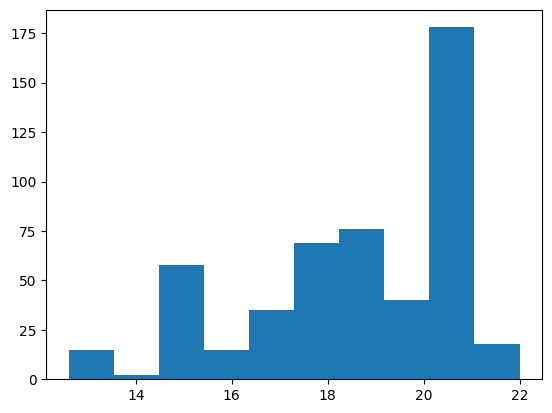

In [7]:
# 정규분포 확인-------------------------------------------------------
plt.hist(bostonDF.ptratio)

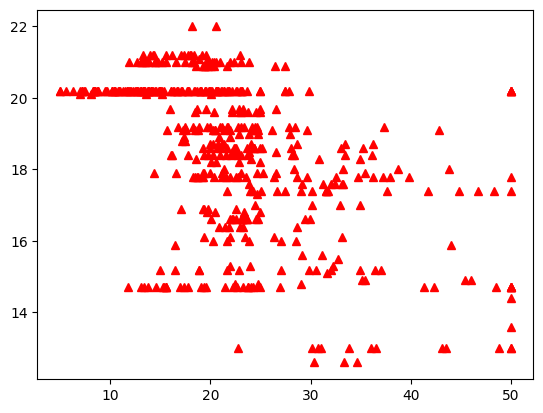

In [8]:
# 선형관계 여부
# 타겟: 집 가격 medv , 독립 : lstat, rm, ptratio
plt.plot(bostonDF.medv,bostonDF.ptratio ,'r^')

### [2] 학습방법 설정 & 데이터 전처리----------------------------------------------------

- 데이터 정제 : 결측치, 이상치, 중복값, 모순값...

- 데이터 변형 : 수치형 => 범주형(이산화), 수치형-> 범위 scale(정규화)

In [9]:
#[2-1] 결측치 체크
bostonDF.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [10]:
# [2-2]모순값 또는 노이즈 데이터 체크 : 다른 데이터와 다른 이상한 값 여부
for col in bostonDF.columns:
    # print(bostonDF[col].unique())
    print(f"--[{col}----------]")
    print(bostonDF[col].value_counts())


--[crim----------]
crim
0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: count, Length: 504, dtype: int64
--[zn----------]
zn
0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: count, dtype: int64
--[indus----------]
indus
18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.21       1
1.38       1
3.75       1
0.46       1
2.31       1
Name: count, Length: 76, dtype: int64
--[chas----------]
chas
0    471
1     35
Name: count, dtype: int64
--[nox----------]
nox
0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.394     1
0.518     1
0.385 

### [3] 학습용 데이터랑 테스트용 데이터 준비----------------------------------------

In [11]:
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [14]:
# 데이터 피쳐와 타겟 분리-------------------------------------------
data=bostonDF[bostonDF.columns[:-1]]
target=bostonDF.medv

In [15]:

X_train, X_test, y_train, y_test=train_test_split(data, target)

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(379, 127, 379, 127)

### [4] 학습 진행----------------------------------------------------

- 학습모델 객체 생성

- 학습진행 <- 학습용 데이터

- 모델평가 <- 예측과 정답 비교

### [4-1] 학습 모델 객체 생성

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model=LinearRegression()

### [4-2] 학습진행 with X_train, y_train

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
# 회귀계수, 절편 => 집가격 = 범죄율 * coef_1+....+하위계층*coef_13 + intercept_
model.coef_,model.intercept_

(array([-1.08732206e-01,  3.97503900e-02,  3.81409362e-02,  2.26156350e+00,
        -1.97313646e+01,  3.38181110e+00,  1.00817030e-02, -1.57998343e+00,
         3.36906531e-01, -1.23841923e-02, -9.81126888e-01,  1.10347026e-02,
        -6.05345127e-01]),
 40.59614779240534)

### [4-3] 평가

- predict() 예측값, 실제값 비교

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

In [22]:
y_pre=model.predict(X_test)

In [23]:
# 실제값과 예측값을 뺀 차이 => 잔차
# 잔차 확인
round(mean_absolute_error(y_test,y_pre),2)

3.4

In [24]:
round(mean_squared_log_error(y_test,y_pre),2)

0.09

In [25]:
round(mean_squared_error(y_test,y_pre),2)

19.64

In [26]:
# 모델 예측 성능 평가 => R2
round(r2_score(y_test,y_pre),2)

0.77

In [27]:
# 회귀용 성능평가 함수------------------------------------------------
def getEvalueate(y_test,y_pre):
    mae=round(mean_absolute_error(y_test,y_pre),2)
    mse=round(mean_squared_error(y_test,y_pre),2)
    rmse=round(mean_squared_log_error(y_test,y_pre),2)
    r2=round(r2_score(y_test,y_pre),2)

    return mae, mse, rmse,r2

getEvalueate(y_test,y_pre)

(3.4, 19.64, 0.09, 0.77)

### 성능이 좋지 않는 모델 개선-----------------------------------------

- 데이터 수는 충분한가?? ---> 교차검증 cross_val_score(), cross_validate()

- 데이터 전처리는 문제가 없는가? -> 정규화, 선형, 수치 피쳐 정규화, 타겟 수치 피쳐 정규화...

- 모델은 괜찮은가?--> 다른 선형회귀 모델 ??

In [28]:
# [1] 교차 검증
from sklearn.model_selection import cross_val_score, cross_validate
lr = LinearRegression()

In [29]:
lr = LinearRegression()

In [30]:
len(X_train), len(y_train), len(X_test), len(y_test)

(379, 379, 127, 127)

In [31]:
# 교차검증 진행

cross_val_score(lr, X_train,y_train, scoring="neg_mean_squared_error")

array([-23.60411428, -22.69052948, -30.19322314, -24.97924848,
       -24.879992  ])

In [32]:
cross_validate(lr, X_train,y_train, scoring=["r2","neg_mean_squared_error"],cv = 30, return_estimator = True)

{'fit_time': array([0.00200438, 0.00200224, 0.00200748, 0.00198293, 0.00198364,
        0.00199938, 0.00098157, 0.00098634, 0.00100899, 0.00099659,
        0.00099683, 0.00099659, 0.0019927 , 0.0009954 , 0.00098825,
        0.00099254, 0.00100732, 0.00099564, 0.00099802, 0.00200534,
        0.00198436, 0.00099301, 0.00099683, 0.00099778, 0.00199604,
        0.00100994, 0.00100541, 0.00200391, 0.00099874, 0.00200295]),
 'score_time': array([0.00198269, 0.00098705, 0.00099301, 0.00100684, 0.0009954 ,
        0.00200248, 0.0010159 , 0.00099564, 0.00099373, 0.0009973 ,
        0.00098753, 0.00099921, 0.00100541, 0.00099659, 0.00099587,
        0.0009861 , 0.00099659, 0.00098681, 0.00199294, 0.00099564,
        0.00100851, 0.00099635, 0.00099635, 0.0009954 , 0.00098681,
        0.00099277, 0.00198507, 0.0019908 , 0.00198388, 0.00198364]),
 'estimator': (LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearR

### 여기부터